In [163]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pydataset as data


Has the network latency gone up since we switched internet service providers?


- (null hypothesis) No the network latency has not changed
- (a hypothesis) Yes the network latency has changed
- (true positive) Has changed but really didnt
- (true negative) Has not changed but really did change

Is the website redesign any good?

- (null hypothesis) Yes the redsign is good
- (a hypothesis) No the redesign isn't good
- (true positive) Redesign isn't good but really is
- (true negative) Redesign is good but really isn't

Is our television ad driving more sales?

- (null hypothesis) Yes the ad is driving sales
- (a hypothesis) No the ad isn't driving sales
- (true positive) Ad isn't driving sales but really is
- (true negative) Ad is driving but really isn't

### Comparison of Means (Exercises)

1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?


One Sample T-Test (two tailed)

* Are adults who drink milk taller than adults who dont drink milk?


Independent T-Test (one tailed)

* Is the the price of gas higher in texas or in new mexico?

Independent T-Test (one tailed)

* Are there differences in stress levels between students who take data science 
vs students who take web development vs students who take cloud academy?

ANOVA (two tailed)

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [169]:
# Is there a difference in the average time to sell a home for office #1 and office #2 
# comparing two different independent groups (Independet T-Test)
# We just want to see if theres a difference no direction (one tailed)
# null hypothesis = office 1 and office 2 do not have different average sell times
# alternate hypothesis = office 1 and office 2 have different average sell times

In [170]:
alpha = 0.05
# 40 sales
office_1_avg = 90 
office_1_std = 15
# 50 sales
office_2_avg = 100
office_2_std = 20


In [181]:
office_one = stats.norm(office_1_avg, office_1_std).rvs(40)
office_two = stats.norm(office_2_avg, office_2_std).rvs(50)

In [184]:
office_one

array([ 73.88615645,  46.89537738, 118.25030998,  90.34239951,
        84.93723493, 109.41931414,  98.47067491,  86.00433602,
        80.15830154,  88.92818791, 106.95674981,  74.20676827,
        95.1884391 , 108.20839295,  75.24416207, 104.19186479,
        72.57889871,  68.01459023,  85.93587564,  77.13451955,
        83.63325242,  92.66433592,  86.88728711,  99.00896364,
       116.1464659 ,  92.71759269,  98.11713659,  93.84458584,
        95.58926261,  84.41467485,  95.79608984,  71.74821789,
       115.06892871,  83.70804383,  65.81292792,  93.06643659,
        86.49466911,  58.92577615,  87.95656308,  55.1351899 ])

In [197]:
office_two

array([ 73.59718475,  91.64072514,  94.91713823, 113.27691296,
       107.05903424,  81.22551231, 111.44421059,  92.21583429,
       113.79563221,  98.13268658, 100.55037746,  83.14464237,
       104.01528315, 112.33356079,  63.94381988, 113.72576298,
        48.47853326,  70.41337339, 121.88062406,  92.04013636,
       102.62049268, 155.89237071,  76.69957176, 109.07090932,
       103.93772377,  87.33805455,  95.02339914, 148.7182225 ,
        99.02047734, 121.63750729,  97.3652554 ,  80.60338977,
       101.4421638 ,  94.99998844,  80.9098922 ,  83.859178  ,
       125.10304241, 106.29295721,  64.82546778,  53.30560901,
        99.32011877, 112.92432869, 133.02891956,  73.27441777,
       121.09161391,  69.45698696,  79.50299259, 102.32518669,
        97.854434  , 102.26865945])

In [201]:
stat, p_val = stats.levene(office_one, office_two)

In [203]:
stat, p_val

(2.136872393553811, 0.1473567181306041)

In [204]:
t, p = stats.ttest_ind(office_one, office_two)
t, p

(-2.3708499791749387, 0.019930189719280452)

In [205]:
if p/2 < alpha:
    print("We can reject null hypothesis")
else:
    print("We fail to reject hypothesis")

We can reject null hypothesis


In [206]:
stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

3. Load the mpg dataset and use it to answer the following questions:

In [207]:
mpg = data.data("mpg")

In [208]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [49]:
#  The difference (two tailed) of the two independent means 2008(mpg avg) 1999(mpg avg) (Independent T-Test)
# Null hypothesis = There is no difference between the 2008 fuel efficiency and 1999 fuel efficiency
# Alternate hypothesis = There is a difference between the 2008 fuel efficiency and 1999 fuel efficiency

In [210]:
mpg["fuel_avg"] = (mpg["cty"] + mpg["hwy"])/2

# Different types of means (harmonic mean)

In [212]:
mpg["avg_fe"] = stats.hmean(mpg[["cty", "hwy"]], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,fuel_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,21.0


In [213]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,fuel_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727,22.0


In [214]:
mpg_08 = mpg[mpg.year == 2008].fuel_avg

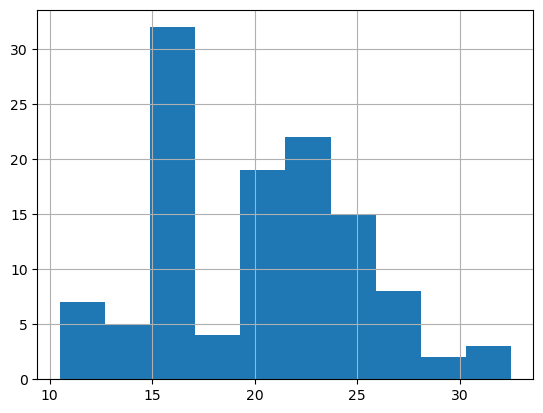

In [66]:
mpg_08.hist()
plot.show()


In [218]:
mpg_99 = mpg[mpg.year == 1999].fuel_avg

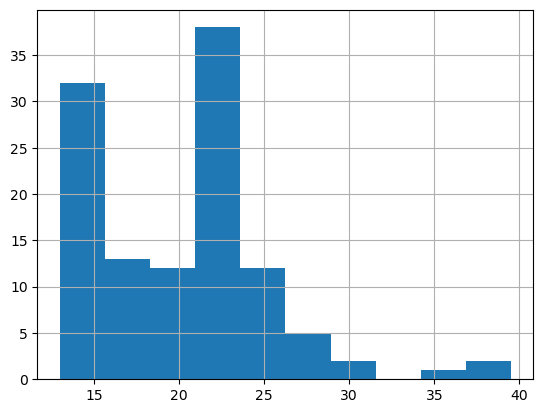

In [219]:
mpg_99.hist()
plot.show()

In [217]:
stats.levene(mpg_08, mpg_99)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [221]:
t, p = stats.ttest_ind(mpg_08, mpg_99)

In [223]:
if p/2 < alpha:
    print("We can reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

We fail to reject null hypothesis


* Are compact cars more fuel-efficient than the average car?

In [224]:
# do compact cars have greater (one tailed) fuel efficiency than the average car (One sample)
# Null hypothesis = There is no difference in fuel efficiency for compact cars and the average car
# alternate hypothesis = There is a difference in fuel efficiency for compact cars and the average car
#  t > 0 & p/2 < alpha 

In [225]:
compact = mpg[mpg["class"] == "compact"].fuel_avg

<AxesSubplot:>

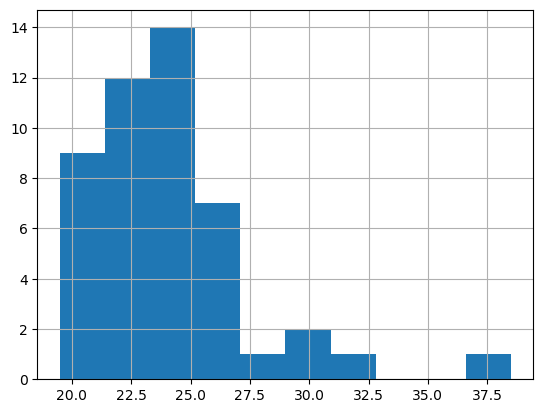

In [243]:
compact.hist()

In [245]:
vehicles = mpg["fuel_avg"]
vehicles_avg = vehicles.mean()

<AxesSubplot:>

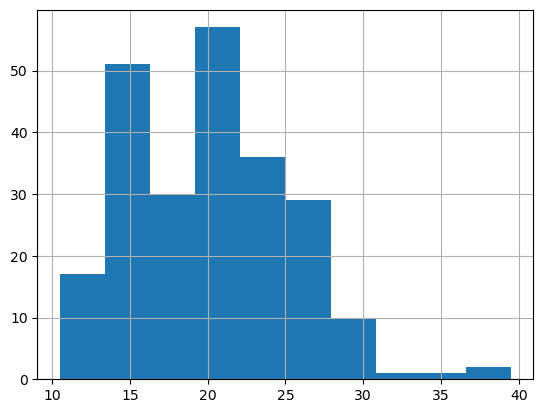

In [247]:
vehicles.hist()

In [239]:
t, p = stats.ttest_1samp(compact, vehicles_avg)

In [248]:
if (p/2 < alpha) and (t >  0):
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")
    
    

We reject Null Hypothesis


* Do manual cars get better gas mileage than automatic cars?

* Do manual cars have greater (one tailed) fuel average than automatic cars 
* two independent means (Independent T-Test)
* $H_{o}$ = maunaul cars do not have a greater fuel average than automatic cars 
* $H_{a}$ = maunaul cars do have a greater fuel average than automatic cars 

In [ ]:
mpg.trans.unique()

In [141]:
manual_types = ["manual(m5)", "manual(m6)"]
manual = mpg.loc[mpg["trans"].isin(manual_types)].fuel_avg

In [142]:
automatic = mpg.loc[~mpg["trans"].isin(manual_types)].fuel_avg

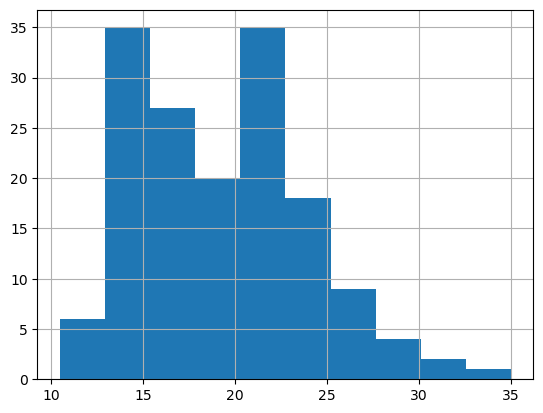

In [145]:
automatic.hist()
plot.show()

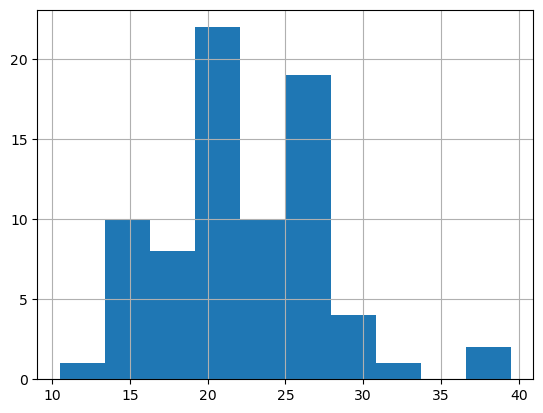

In [146]:
manual.hist()
plot.show()

In [149]:
#equal variances
stats.levene(manual, automatic)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [257]:
t, p = stats.ttest_ind(manual, automatic)

In [258]:
t, p

(4.593437735750014, 7.154374401145683e-06)

In [259]:
if p/2 < alpha:
    print("We reject Null Hypothesis")
elif t >  0:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


In [249]:
#Write with LaTex

$H_{o}$
$H_{a}$